# **Time Series Analysis of Doubleknit Fabric Demand**

This project analyzes historical demand data for doubleknit fabric to develop an accurate forecasting model. The analysis follows a comprehensive time series methodology to identify patterns, seasonality, and trends in the demand data. The dataset is taken from an [Open Time Series Dataset](https://www.kaggle.com/datasets/krish525/open-time-series-data) in [Kaggle](https://www.kaggle.com)

---

### Methodology
The analysis includes:
- Exploratory data analysis and visualization
- Time series decomposition to identify trend, seasonal, and irregular components
- Stationarity assessment using ADF and KPSS tests
- Data transformation using Box-Cox methods to stabilize variance
- Model selection through AIC, BIC, and residual analysis
- Comparison of various ARIMA models on out-of-sample data
- Diagnostic checking of residuals for model validation

---

### Objective
The ultimate goal is to develop a reliable forecasting model that can predict doubleknit fabric demand for the next 24 months, supporting production planning, inventory management, and business decision-making.

---

## **Phase I: Identification**

In [4]:
# Link to the dataset below:
link <- "https://raw.githubusercontent.com/LyesHADJAR/TSAC-Individual-Project/refs/heads/main/data/Demand%20for%20a%20doubleknit%20fabric%20p269%20Montgomery%20Fore%20TS.csv"

In [5]:
# Install required packages if needed
# You can uncomment the install.packages line
# above if you need to install the packages

# install.packages(c("ggplot2", "forecast", "TSA", "tseries", "dplyr",
#                   "lubridate", "gridExtra", "MASS", "knitr", "lawstat",
#                   "FinTS", "ggthemes"))


In [6]:
# Load required libraries and setup plot theme & settings

library(ggplot2)
library(forecast)
library(tseries)
library(dplyr)
library(lubridate)
library(gridExtra)
library(MASS)
library(knitr)
library(lawstat)
library(FinTS)
library(TSA)

options(repr.plot.width = 20, repr.plot.height = 10)
theme_tsa <- function() {
  theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
      plot.subtitle = element_text(hjust = 0.5, size = 12),
      axis.title = element_text(face = "bold"),
      legend.position = "bottom",
      panel.grid.minor = element_line(color = "gray90"),
      panel.grid.major = element_line(color = "gray85")
    )
}

In [7]:
# loading the dataset
# checking for missing values
# and displaying the summary of the dataset
# create a data frame

data <- read.csv(link, header = TRUE)
summary(data)

missing_values <- sum(is.na(data))
if (missing_values > 0) {
  cat("There are", missing_values, "missing values in the dataset.\n")
} else {
  cat("There are no missing values in the dataset.\n")
}
head(data)

stats <- data %>%
  summarise(
    mean = mean(x),
    median = median(x),
    sd = sd(x),
    min = min(x),
    max = max(x)
  )
print(stats)

fabric_ts_df <- data %>%
  mutate(
    week = seq(1, nrow(data)),
    x = as.numeric(x),
  )

      week              x        
 Min.   :  1.00   Min.   :467.0  
 1st Qu.: 60.75   1st Qu.:560.8  
 Median :120.50   Median :600.0  
 Mean   :120.50   Mean   :591.6  
 3rd Qu.:180.25   3rd Qu.:625.5  
 Max.   :240.00   Max.   :704.0  

There are no missing values in the dataset.


,week,x
,<int>,<int>
1,1,656
2,2,659
3,3,601
4,4,624
5,5,545
6,6,502


      mean median       sd min max
1 591.5833    600 49.39341 467 704


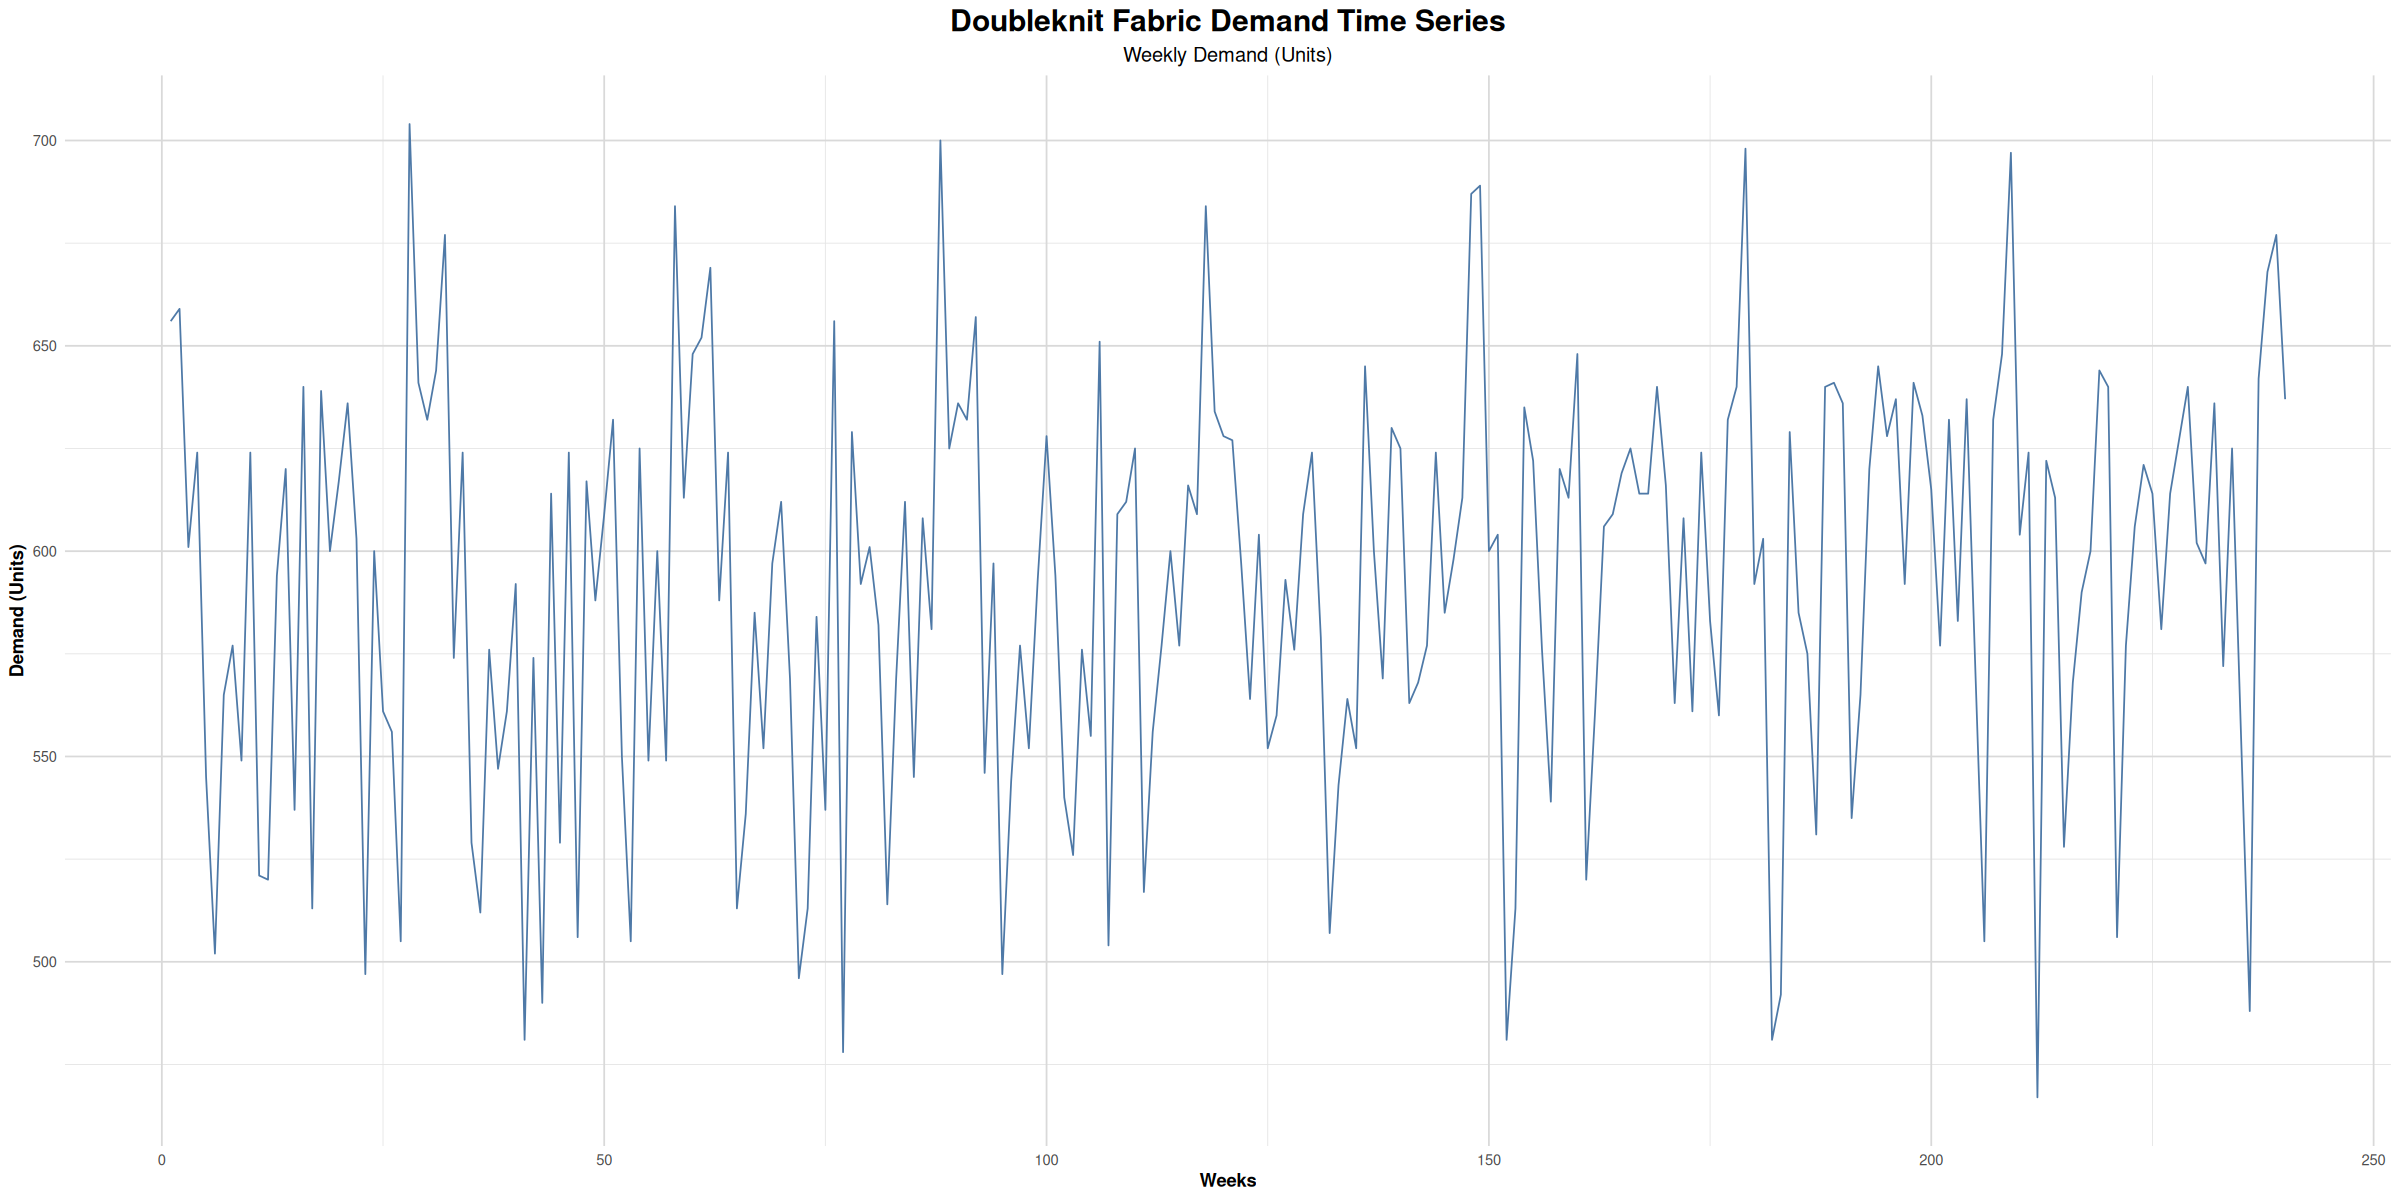

In [ ]:
# plotting the series

p1 <- ggplot(fabric_ts_df, aes(x = week, y = x)) +
  geom_line(color = "#4E79A7") +
  labs(
    title = "Doubleknit Fabric Demand Time Series",
    subtitle = "Weekly Demand (Units)",
    x = "Weeks",
    y = "Demand (Units)"
  ) +
  theme_tsa()

print(p1)

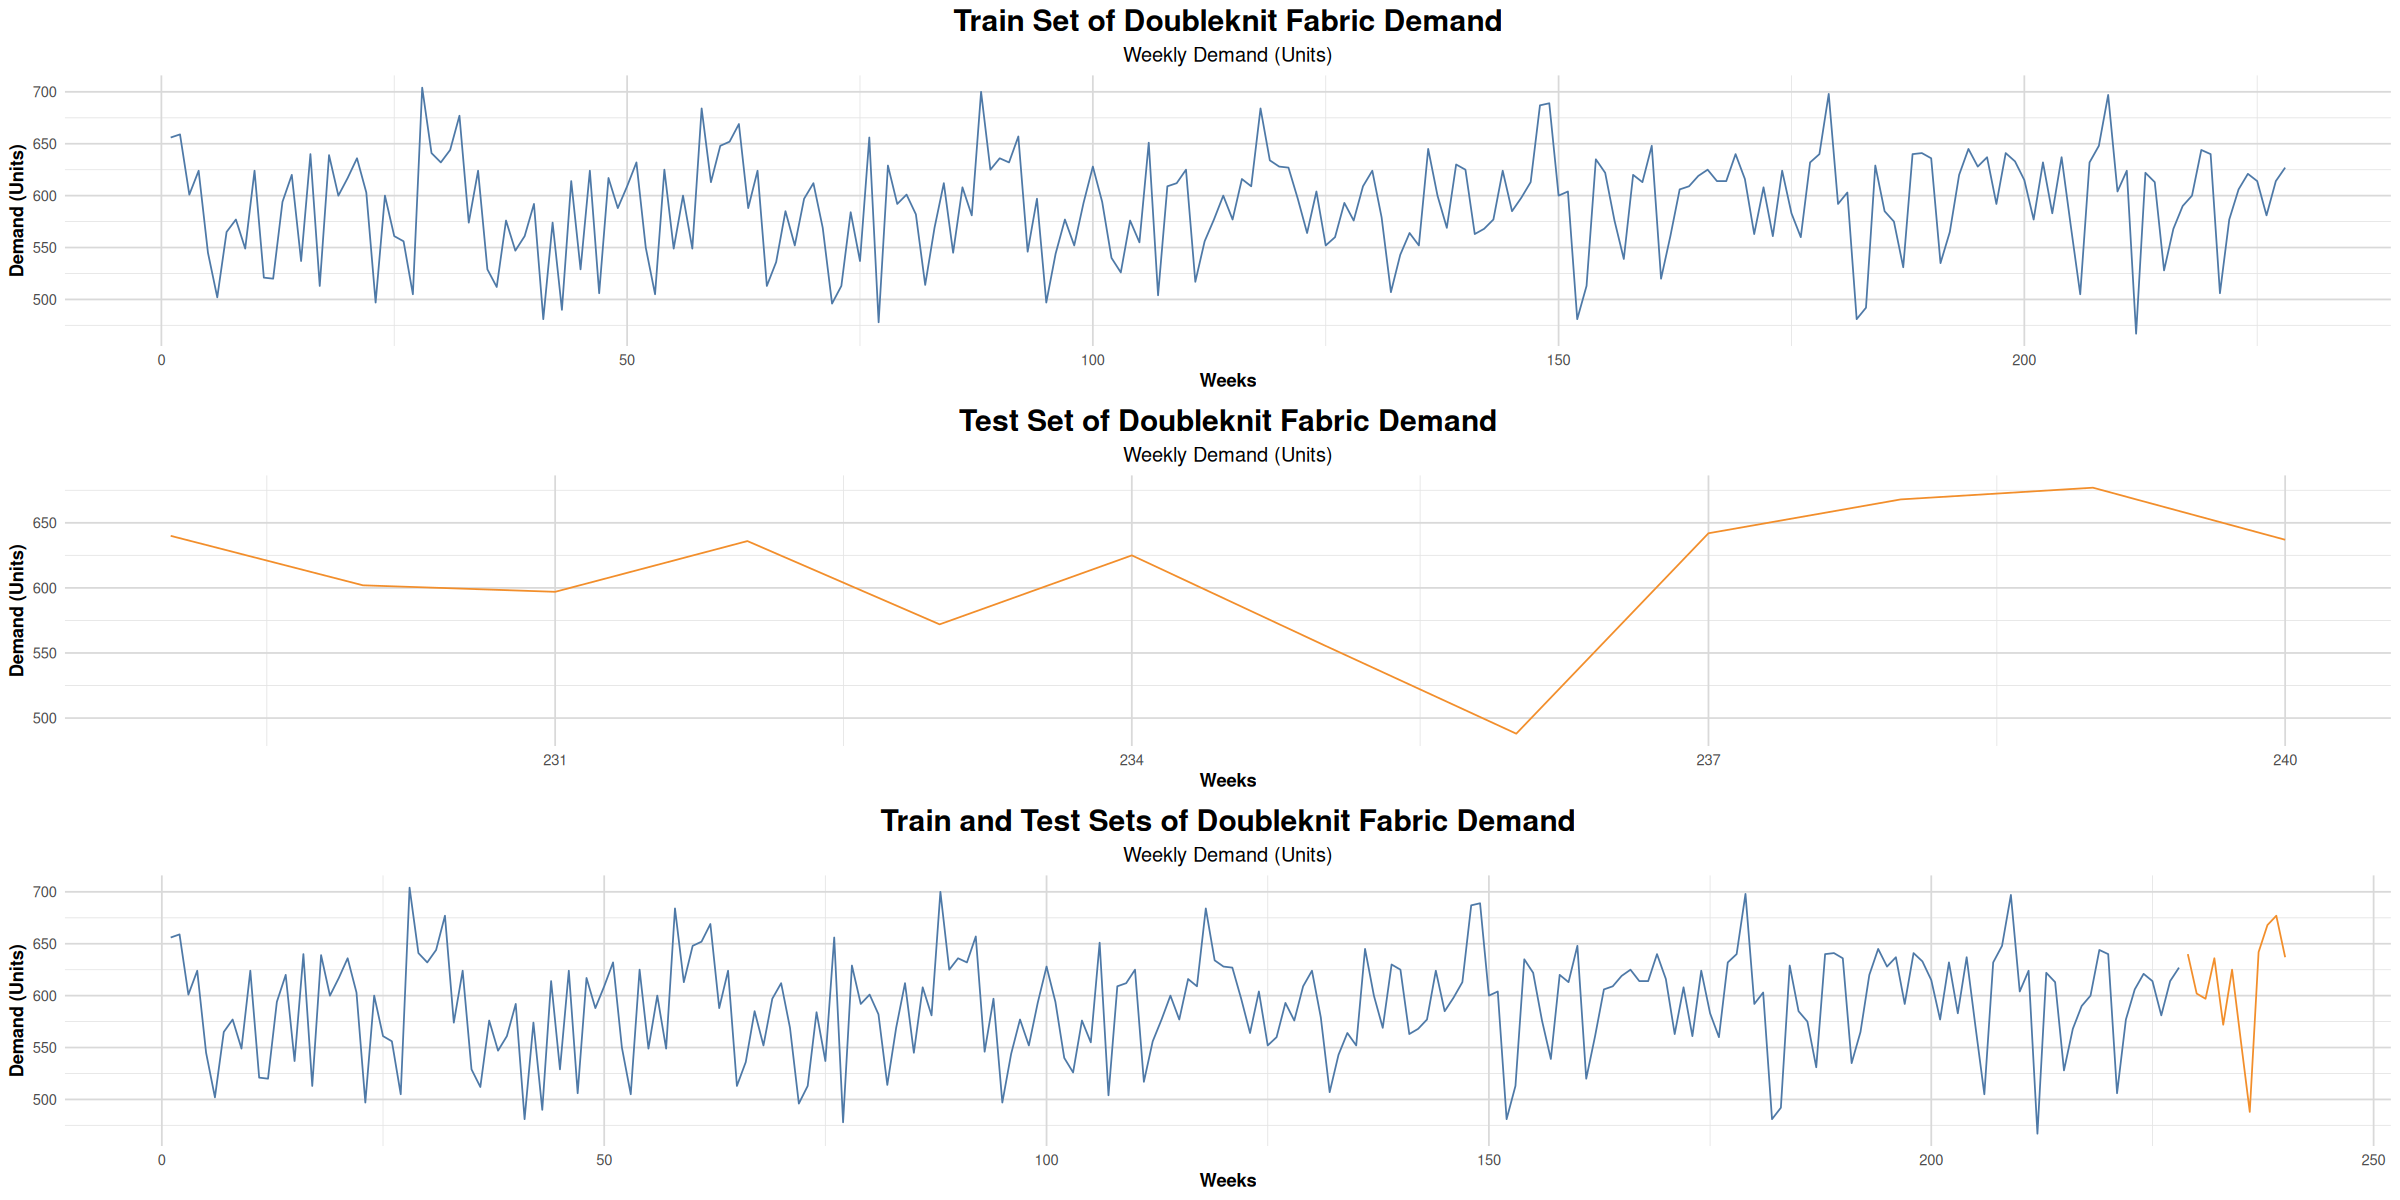

In [9]:
# devide into train and test sets
train_size <- round(0.95 * nrow(fabric_ts_df))
train <- fabric_ts_df$x[1:train_size]
test <- fabric_ts_df$x[(train_size + 1):nrow(fabric_ts_df)]
train_df <- fabric_ts_df[1:train_size, ]
test_df <- fabric_ts_df[(train_size + 1):nrow(fabric_ts_df), ]
# plotting the train and test sets

p2 <- ggplot(train_df, aes(x = week, y = x)) +
  geom_line(color = "#4E79A7") +
  labs(
    title = "Train Set of Doubleknit Fabric Demand",
    subtitle = "Weekly Demand (Units)",
    x = "Weeks",
    y = "Demand (Units)"
  ) +
  theme_tsa()
p3 <- ggplot(test_df, aes(x = week, y = x)) +
  geom_line(color = "#F28E2B") +
  labs(
    title = "Test Set of Doubleknit Fabric Demand",
    subtitle = "Weekly Demand (Units)",
    x = "Weeks",
    y = "Demand (Units)"
  ) +
  theme_tsa()
p4 <- ggplot() +
  geom_line(data = train_df, aes(x = week, y = x), color = "#4E79A7") +
  geom_line(data = test_df, aes(x = week, y = x), color = "#F28E2B") +
  labs(
    title = "Train and Test Sets of Doubleknit Fabric Demand",
    subtitle = "Weekly Demand (Units)",
    x = "Weeks",
    y = "Demand (Units)"
  ) +
  theme_tsa()
grid.arrange(p2, p3, p4, ncol = 1)

In [10]:
adf_test <- adf.test(train)
kpss_test <- kpss.test(train)

cat("Augmented Dickey-Fuller Test:\n")
if (adf_test$p.value < 0.05) {
  cat("The time series is stationary (p-value:", adf_test$p.value,")\n")
} else {
  cat("The time series is non-stationary (p-value:", adf_test$p.value,")\n")
}

cat("\nKPSS Test:\n")
if (kpss_test$p.value < 0.05) {
  cat("The time series is non-stationary (p-value:", kpss_test$p.value,")\n")
} else {
  cat("The time series is stationary (p-value:", kpss_test$p.value,")\n")
}

Warning message in adf.test(train):
“p-value smaller than printed p-value”


Warning message in kpss.test(train):
“p-value greater than printed p-value”


Augmented Dickey-Fuller Test:
The time series is stationary (p-value: 0.01 )

KPSS Test:
The time series is stationary (p-value: 0.1 )


Series is stationary no need for differencing

Confidence interval for lambda: [ 1.171717 , 3.757576 ]


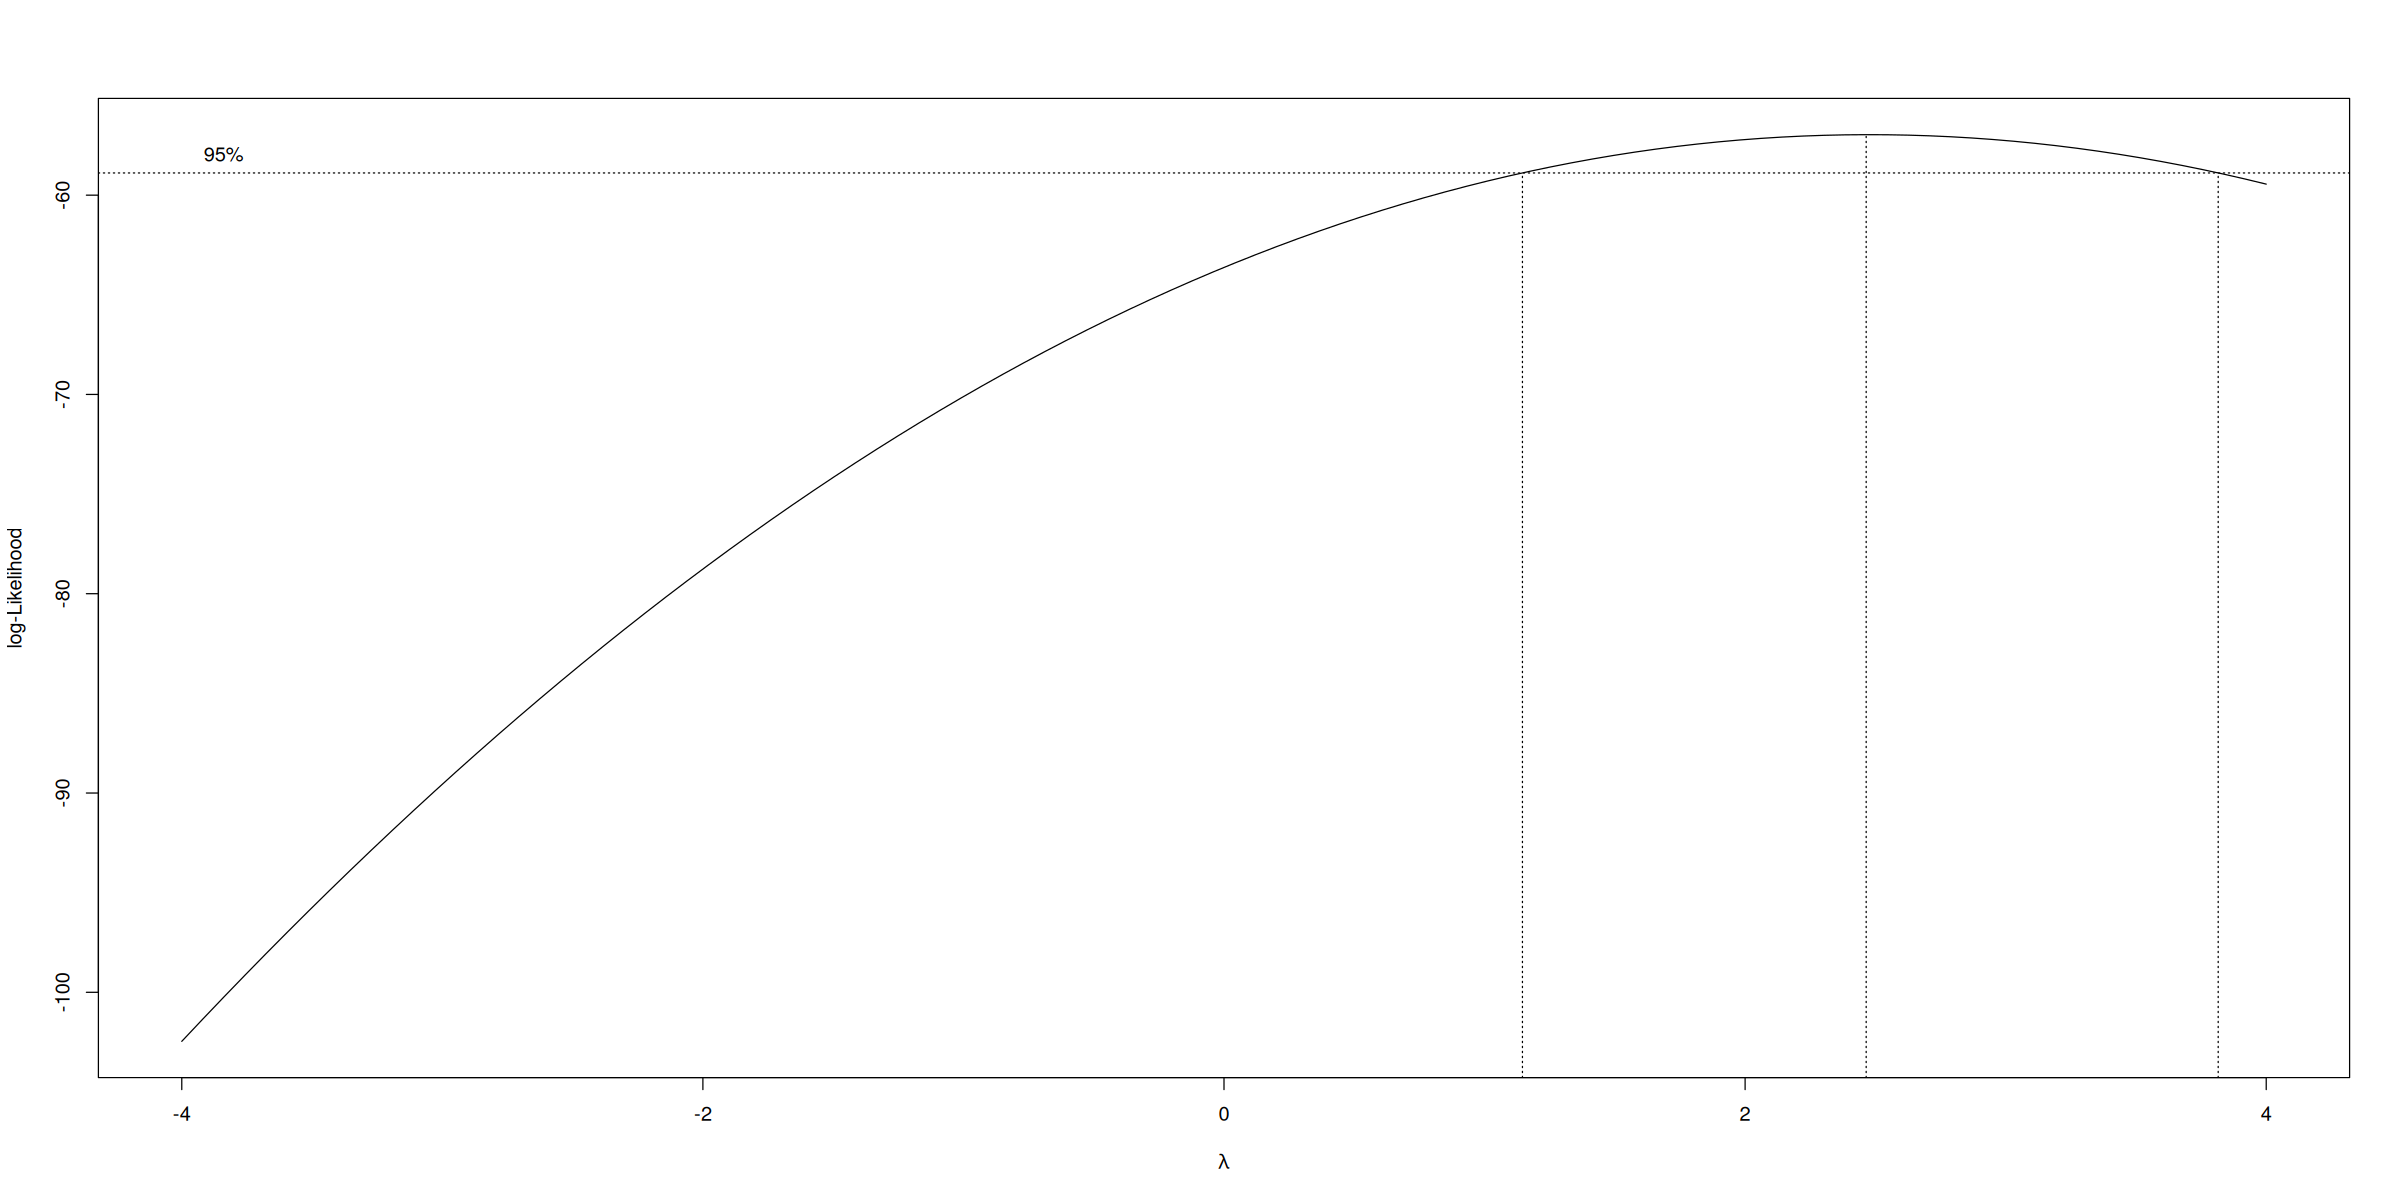

In [11]:
model <- lm(x ~ as.numeric(week), data = data)
par(bg = "white")
boxcox_result <- boxcox(model, lambda = seq(-4, 4, by = 0.1))

lambda_interval <- boxcox_result$x[boxcox_result$y > max(boxcox_result$y)
                                   - qchisq(0.95, df = 1) / 2]

cat("Confidence interval for lambda: [", min(lambda_interval), ",",
    max(lambda_interval), "]\n")

The previous plot suggests that optimal value for $ \lambda $ is in the interval $ [1.17, 3.75] $

We can take $ \lambda = 2 $ and apply a quadratic transformation.

In [19]:
# apply the transformation lambda = 2

lambda <- 2
transformed_data <- (train^lambda - 1) / lambda

In [21]:
print(transformed_data)

  [1] 215167.5 217140.0 180600.0 194687.5 148512.0 126001.5 159612.0 166464.0
  [9] 150700.0 194687.5 135720.0 135199.5 176417.5 192199.5 144184.0 204799.5
 [17] 131584.0 204160.0 179999.5 190344.0 202247.5 181804.0 123504.0 179999.5
 [25] 157360.0 154567.5 127512.0 247807.5 205440.0 199711.5 207367.5 229164.0
 [33] 164737.5 194687.5 139920.0 131071.5 165887.5 149604.0 157360.0 175231.5
 [41] 115680.0 164737.5 120049.5 188497.5 139920.0 194687.5 128017.5 190344.0
 [49] 172871.5 185440.0 199711.5 151249.5 127512.0 195312.0 150700.0 179999.5
 [57] 150700.0 233927.5 187884.0 209951.5 212551.5 223780.0 172871.5 194687.5
 [65] 131584.0 143647.5 171112.0 152351.5 178204.0 187271.5 161880.0 123007.5
 [73] 131584.0 170527.5 144184.0 215167.5 114241.5 197820.0 175231.5 180600.0
 [81] 169361.5 132097.5 161880.0 187271.5 148512.0 184831.5 168780.0 244999.5
 [89] 195312.0 202247.5 199711.5 215824.0 149057.5 178204.0 123504.0 147967.5
 [97] 166464.0 152351.5 175824.0 197191.5 176417.5 145799.5 1383

In [20]:
# plot the transdormed series compared to the original series

p5 <- ggplot() +
  geom_line(data = train_df, aes(x = week, y = x), color = "#4E79A7") +
  geom_line(data = transformed_data, aes(x = week, y = x), color = "#F28E2B") +
  labs(
    title = "Transformed vs Original Series",
    subtitle = "Weekly Demand (Units)",
    x = "Weeks",
    y = "Demand (Units)"
  ) +
  theme_tsa()

print(p5)

ERROR: [1m[33mError[39m in `fortify()`:[22m
[1m[22m[33m![39m `data` must be a [34m<data.frame>[39m, or an object coercible by `fortify()`,
  or a valid [34m<data.frame>[39m-like object coercible by `as.data.frame()`.
[1mCaused by error in `.prevalidate_data_frame_like_object()`:[22m
[1m[22m[33m![39m `dim(data)` must return an [34m<integer>[39m of length 2.


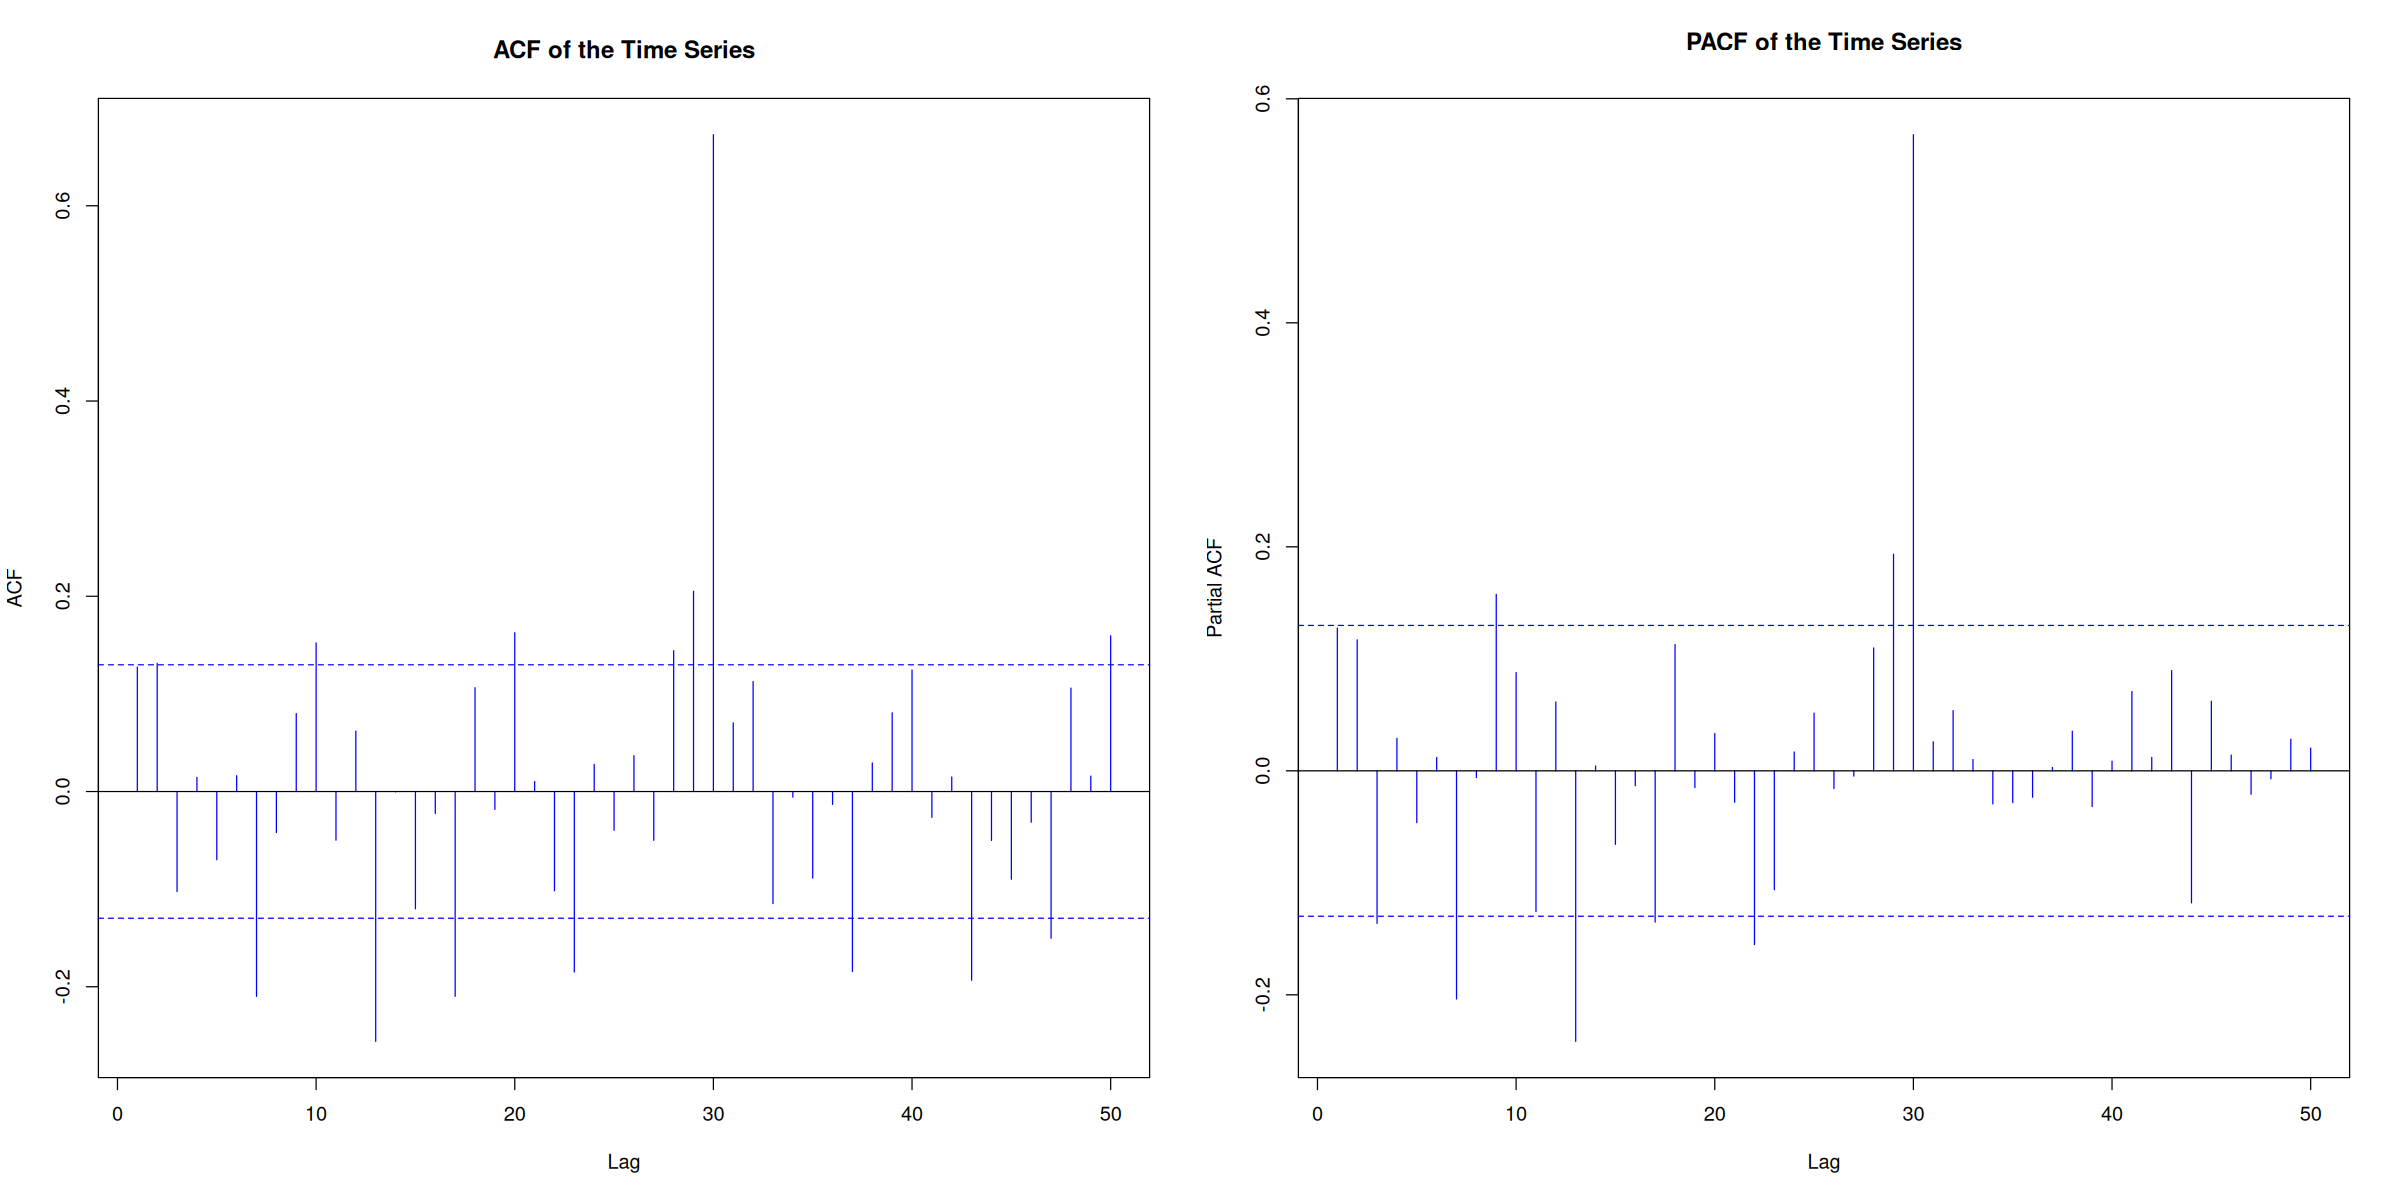

In [32]:
# plot ACF & PACF and examine them

par(mfrow = c(1, 2),bg = "white")
acf(train, main = "ACF of the Time Series", lag.max = 50, col = "blue")
pacf(train, main = "PACF of the Time Series", lag.max = 50, col = "blue")

## **Phase II: Estimating and Testing**

Since the ACF and PACF plots show a significant number of lags and the order of differencing is 0, we can use an ARMA model we will an fit ARMA model, testing the hypothesis we discussed in the end of the previous section.

In [ ]:
# selecting the best ARMA using armasubsets()

arma_subsets <- armasubsets(train, 10, 10)

Subset selection object
Call: armasubsets(train, 10, 10)
20 Variables  (and intercept)
              Forced in Forced out
`Y-lag1`          FALSE      FALSE
`Y-lag2`          FALSE      FALSE
`Y-lag3`          FALSE      FALSE
`Y-lag4`          FALSE      FALSE
`Y-lag5`          FALSE      FALSE
`Y-lag6`          FALSE      FALSE
`Y-lag7`          FALSE      FALSE
`Y-lag8`          FALSE      FALSE
`Y-lag9`          FALSE      FALSE
`Y-lag10`         FALSE      FALSE
`error-lag1`      FALSE      FALSE
`error-lag2`      FALSE      FALSE
`error-lag3`      FALSE      FALSE
`error-lag4`      FALSE      FALSE
`error-lag5`      FALSE      FALSE
`error-lag6`      FALSE      FALSE
`error-lag7`      FALSE      FALSE
`error-lag8`      FALSE      FALSE
`error-lag9`      FALSE      FALSE
`error-lag10`     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive


In [ ]:
# select the best ARMA model based on BIC using grid search
# and display the best model order and BIC value

best_bic <- Inf
best_order <- c(0, 0)
best_model <- NULL
for (p in 0:10) {
  for (q in 0:10) {
    model <- Arima(train, order = c(p, 0, q))
    bic <- BIC(model)
    if (bic < best_bic) {
      best_bic <- bic
      best_order <- c(p, q)
      best_model <- model
    }
  }
}
cat("Best ARMA model order (p, q):", best_order, "\n")
cat("BIC of the best ARMA model:", best_bic, "\n")

In [ ]:
# using grid search to find the best ARMA again using AICc
best_aicc <- Inf
best_order_aicc <- c(0, 0)
best_model_aicc <- NULL
for (p in 0:10) {
  for (q in 0:10) {
    model <- Arima(train, order = c(p, 0, q))
    aicc <- AICc(model)
    if (aicc < best_aicc) {
      best_aicc <- aicc
      best_order_aicc <- c(p, q)
      best_model_aicc <- model
    }
  }
}
cat("Best ARMA model order (p, q) using AICc:", best_order_aicc, "\n")
cat("AICc of the best ARMA model using AICc:", best_aicc, "\n")

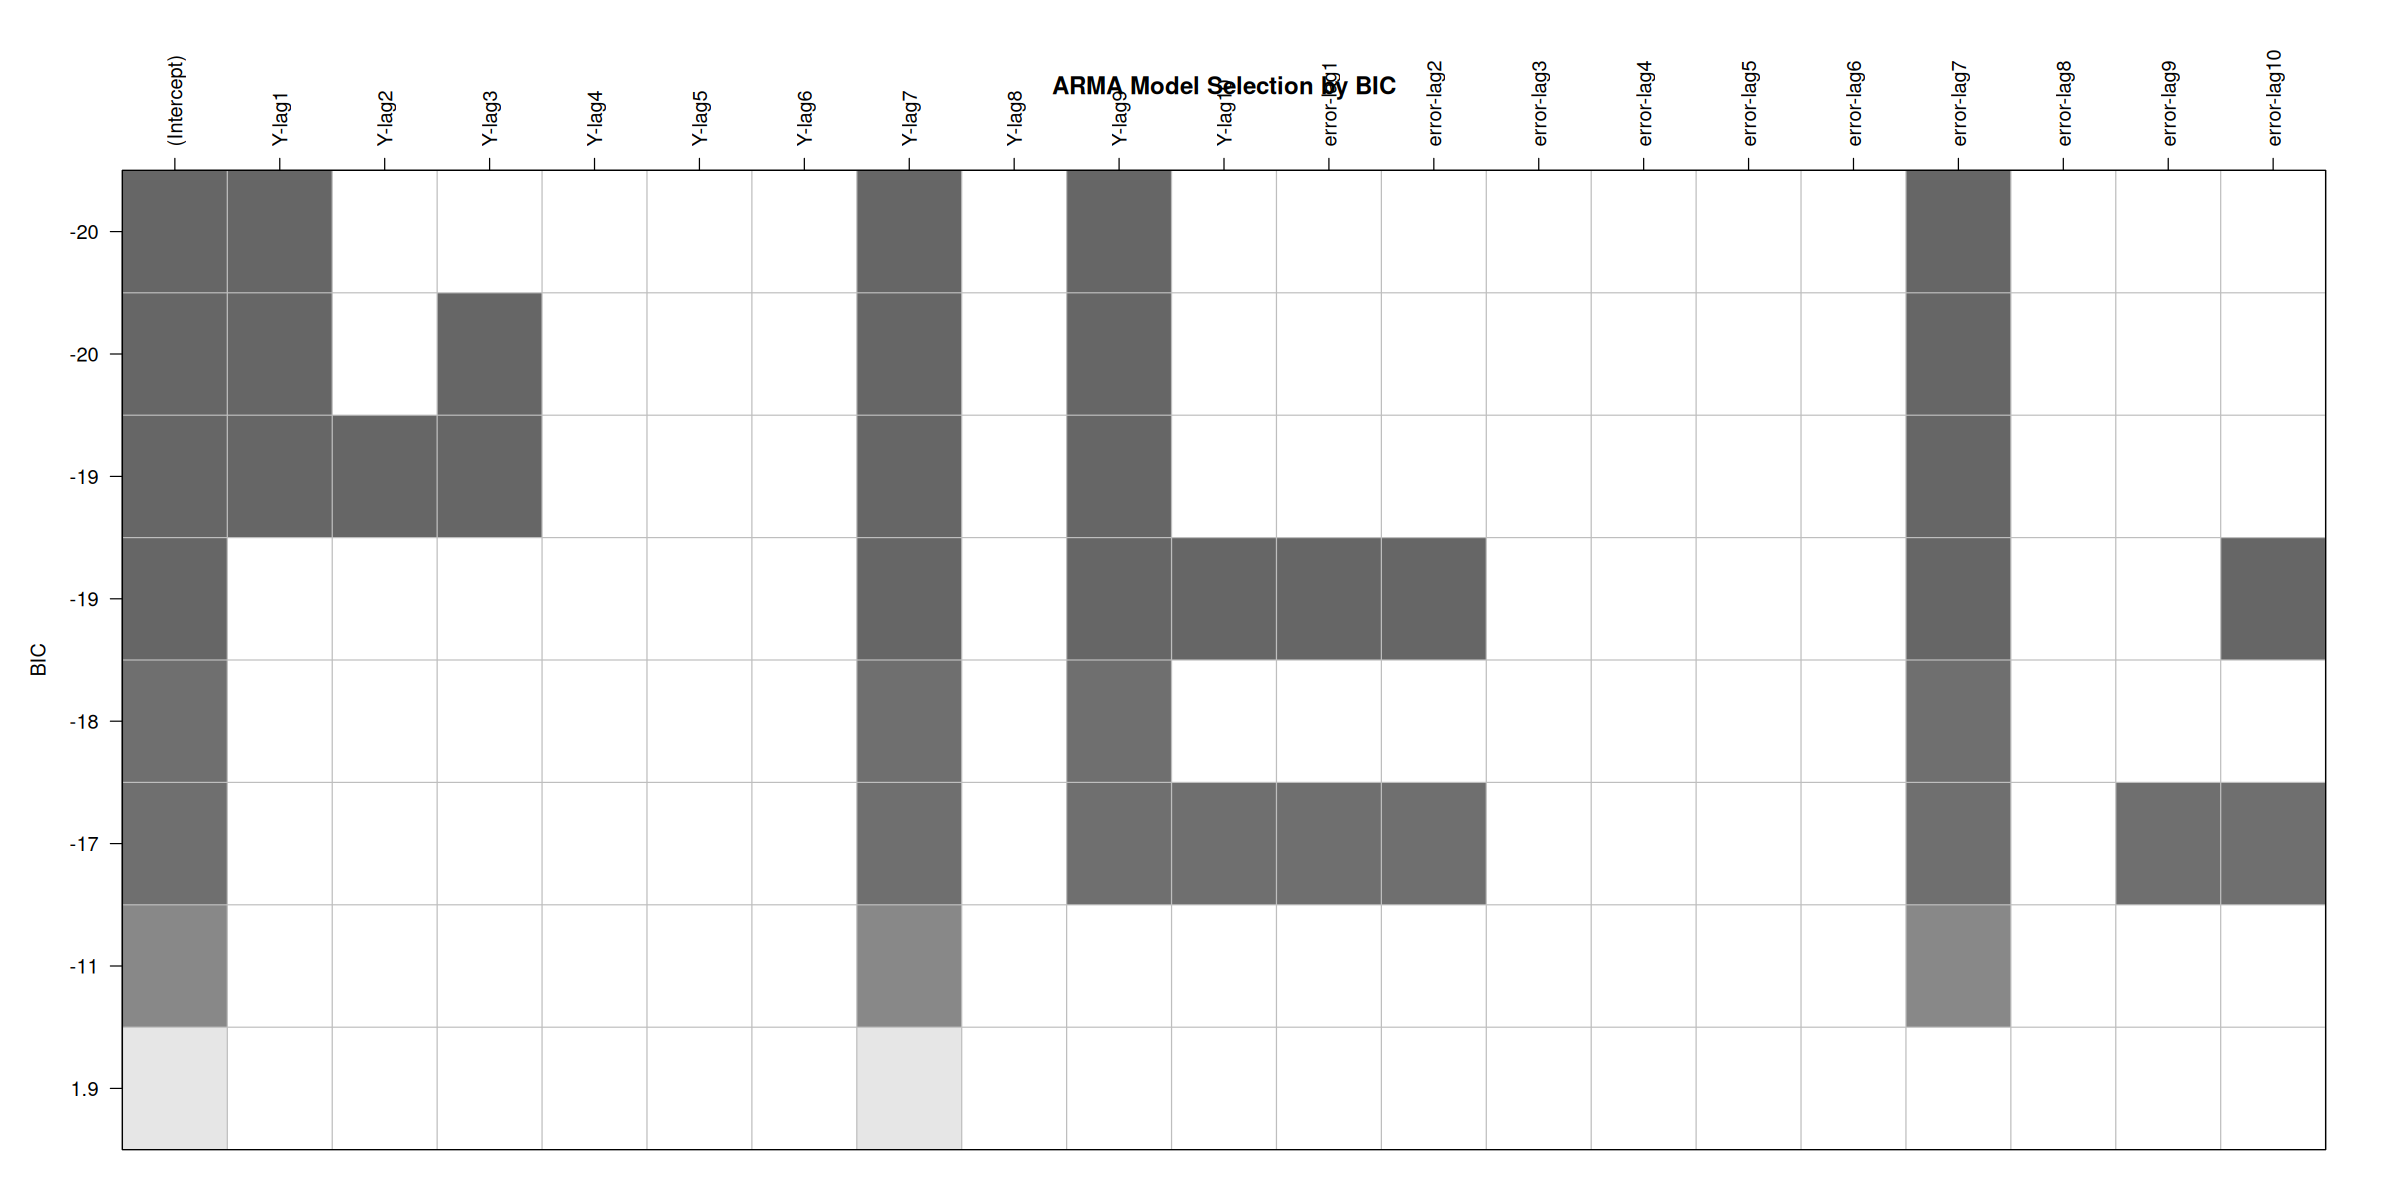

In [23]:
# Grid search for best ARIMA models
max_p <- 8
max_q <- 8

aic_values <- matrix(NA, nrow = max_p + 1, ncol = max_q + 1)
bic_values <- matrix(NA, nrow = max_p + 1, ncol = max_q + 1)

cat("\nFitting ARIMA models with different orders...\n")
for (p in 0:max_p) {
  for (q in 0:max_q) {
    if (p == 0 && q == 0) next
    
    cat(sprintf("Fitting ARIMA(%d,%d,%d)...\n", p, d_value, q))
    
    tryCatch({
      model <- Arima(transformed_ts, order = c(p, d_value, q))
      aic_values[p+1, q+1] <- model$aic
      bic_values[p+1, q+1] <- model$bic
    }, error = function(e) {
      cat("  Error:", e$message, "\n")
    })
  }
}

model_data <- data.frame(
  p = rep(0:max_p, each = max_q + 1),
  q = rep(0:max_q, max_p + 1),
  AIC = as.vector(aic_values),
  BIC = as.vector(bic_values)
)

model_data <- model_data[!is.na(model_data$AIC) & !is.na(model_data$BIC), ]
model_data$Model <- paste0("(", model_data$p, ",", d_value, ",", model_data$q, ")")

best_aic_model <- model_data[which.min(model_data$AIC), ]
best_bic_model <- model_data[which.min(model_data$BIC), ]

cat("\nBest model by AIC: ARIMA", best_aic_model$Model, "with AIC =", round(best_aic_model$AIC, 2), "\n")
cat("Best model by BIC: ARIMA", best_bic_model$Model, "with BIC =", round(best_bic_model$BIC, 2), "\n")

# Auto.arima for comparison
auto_arima <- auto.arima(transformed_ts, d=d_value, max.p=10, max.q=10, 
                          seasonal=FALSE, stepwise=TRUE, approximation=FALSE)
cat("\nModel selected by auto.arima:\n")
print(auto_arima)



Fitting ARIMA models with different orders...
Fitting ARIMA(0,0,1)...
Fitting ARIMA(0,0,2)...
Fitting ARIMA(0,0,3)...
Fitting ARIMA(0,0,4)...
Fitting ARIMA(0,0,5)...
Fitting ARIMA(0,0,6)...
Fitting ARIMA(0,0,7)...
Fitting ARIMA(0,0,8)...
Fitting ARIMA(1,0,0)...
Fitting ARIMA(1,0,1)...
Fitting ARIMA(1,0,2)...
Fitting ARIMA(1,0,3)...
Fitting ARIMA(1,0,4)...
Fitting ARIMA(1,0,5)...
Fitting ARIMA(1,0,6)...
Fitting ARIMA(1,0,7)...
Fitting ARIMA(1,0,8)...
Fitting ARIMA(2,0,0)...
Fitting ARIMA(2,0,1)...
Fitting ARIMA(2,0,2)...
Fitting ARIMA(2,0,3)...
Fitting ARIMA(2,0,4)...
Fitting ARIMA(2,0,5)...
Fitting ARIMA(2,0,6)...
Fitting ARIMA(2,0,7)...
Fitting ARIMA(2,0,8)...
Fitting ARIMA(3,0,0)...
Fitting ARIMA(3,0,1)...
Fitting ARIMA(3,0,2)...
Fitting ARIMA(3,0,3)...
  Error: non-stationary AR part from CSS 
Fitting ARIMA(3,0,4)...
Fitting ARIMA(3,0,5)...
Fitting ARIMA(3,0,6)...
Fitting ARIMA(3,0,7)...
Fitting ARIMA(3,0,8)...
Fitting ARIMA(4,0,0)...
Fitting ARIMA(4,0,1)...
Fitting ARIMA(4,0,2)...

In [24]:
# Split data for training and testing
n_observations <- length(transformed_ts)
train_end <- n_observations - 24  # Use last 2 years (24 months) for testing

train_ts <- window(transformed_ts, end = c(time(transformed_ts)[train_end]))
test_ts <- window(transformed_ts, start = c(time(transformed_ts)[train_end + 1]))

# Define candidate models
candidate_models <- list(
  list(p=7, d=0, q=8, name="ARIMA(7,0,8) - Best AIC (Grid Search)"),
  list(p=3, d=0, q=7, name="ARIMA(3,0,7) - Best BIC (Grid Search)"),
  list(p=9, d=0, q=7, name="ARIMA(9,0,7) - Top ARMASUBSETS Model"),
  list(p=10, d=0, q=10, name="ARIMA(10,0,10) - Top ARMASUBSETS Model")
)

# Add auto.arima model if different from previous models
auto_arima_order <- arimaorder(auto_arima)
auto_model_name <- paste0("ARIMA(", auto_arima_order[1], ",", auto_arima_order[2], ",", auto_arima_order[3], ") - auto.arima")

existing_orders <- sapply(candidate_models, function(x) paste(x$p, x$d, x$q))
auto_order <- paste(auto_arima_order[1], auto_arima_order[2], auto_arima_order[3])

if (!auto_order %in% existing_orders) {
  candidate_models <- c(candidate_models, list(list(
    p=auto_arima_order[1], d=auto_arima_order[2], q=auto_arima_order[3], 
    name=auto_model_name
  )))
}

# Fit models and evaluate forecasts
forecast_results <- data.frame(
  Model = character(),
  RMSE = numeric(),
  MAE = numeric(),
  MAPE = numeric(),
  stringsAsFactors = FALSE
)

fitted_models <- list()

for (model in candidate_models) {
  model_name <- model$name
  p <- model$p
  d <- model$d
  q <- model$q
  
  cat(sprintf("\nFitting %s...\n", model_name))
  
  tryCatch({
    # Fit model
    arima_model <- Arima(train_ts, order = c(p, d, q))
    fitted_models[[model_name]] <- arima_model
    
    # Generate forecasts
    h <- length(test_ts)
    forecasts <- forecast(arima_model, h = h)
    
    # Calculate error metrics
    errors <- test_ts - forecasts$mean
    rmse <- sqrt(mean(errors^2))
    mae <- mean(abs(errors))
    mape <- mean(abs(errors / test_ts)) * 100
    
    cat(sprintf("RMSE: %.4f, MAE: %.4f, MAPE: %.2f%%\n", rmse, mae, mape))
    
    # Add to results
    forecast_results <- rbind(forecast_results, data.frame(
      Model = model_name,
      RMSE = rmse,
      MAE = mae,
      MAPE = mape
    ))
    
  }, error = function(e) {
    cat("  Error:", e$message, "\n")
  })
}

# Sort by RMSE
forecast_results <- forecast_results[order(forecast_results$RMSE), ]
rownames(forecast_results) <- NULL

cat("\nOut-of-sample forecast accuracy comparison:\n")
print(forecast_results)

# Identify best model
best_model_name <- forecast_results$Model[1]
cat("\nBest model based on forecast accuracy (RMSE):", best_model_name, "\n")



Fitting ARIMA(7,0,8) - Best AIC (Grid Search)...
RMSE: 25869.9620, MAE: 20736.5580, MAPE: 11.49%

Fitting ARIMA(3,0,7) - Best BIC (Grid Search)...
RMSE: 26398.9474, MAE: 21877.3708, MAPE: 12.35%

Fitting ARIMA(9,0,7) - Top ARMASUBSETS Model...
RMSE: 24900.0963, MAE: 21083.0742, MAPE: 11.70%

Fitting ARIMA(10,0,10) - Top ARMASUBSETS Model...
RMSE: 23059.3166, MAE: 18597.5281, MAPE: 10.29%

Fitting ARIMA(3,0,0) - auto.arima...
RMSE: 27438.4242, MAE: 22576.7099, MAPE: 12.69%

Out-of-sample forecast accuracy comparison:
                                   Model     RMSE      MAE     MAPE
1 ARIMA(10,0,10) - Top ARMASUBSETS Model 23059.32 18597.53 10.29357
2   ARIMA(9,0,7) - Top ARMASUBSETS Model 24900.10 21083.07 11.70299
3  ARIMA(7,0,8) - Best AIC (Grid Search) 25869.96 20736.56 11.48957
4  ARIMA(3,0,7) - Best BIC (Grid Search) 26398.95 21877.37 12.34740
5              ARIMA(3,0,0) - auto.arima 27438.42 22576.71 12.69012

Best model based on forecast accuracy (RMSE): ARIMA(10,0,10) - Top A

Fitting ARIMA(10,0,10) on full data

Model summary:
Series: transformed_ts 
ARIMA(10,0,10) with non-zero mean 

Coefficients:
          ar1      ar2     ar3      ar4      ar5     ar6      ar7     ar8
      -0.1503  -0.0438  0.1867  -0.2390  -0.0165  0.3752  -0.3577  0.0645
s.e.   0.0923   0.1371  0.1393   0.0977   0.0555  0.0538   0.0793  0.1261
         ar9    ar10     ma1     ma2      ma3     ma4     ma5      ma6     ma7
      0.2738  0.7515  0.2493  0.3114  -0.1611  0.3220  0.0533  -0.2582  0.1777
s.e.  0.1394  0.1073  0.0745  0.1165   0.1204  0.1041  0.0816   0.0681  0.0808
          ma8      ma9     ma10        mean
      -0.2413  -0.3003  -0.8744  176232.728
s.e.   0.1061   0.1116   0.0915    2462.012

sigma^2 = 565213555:  log likelihood = -2756.21
AIC=5556.42   AICc=5561.08   BIC=5632.99

	Ljung-Box test

data:  Residuals from ARIMA(10,0,10) with non-zero mean
Q* = 27.105, df = 4, p-value = 1.893e-05

Model df: 20.   Total lags used: 24



Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


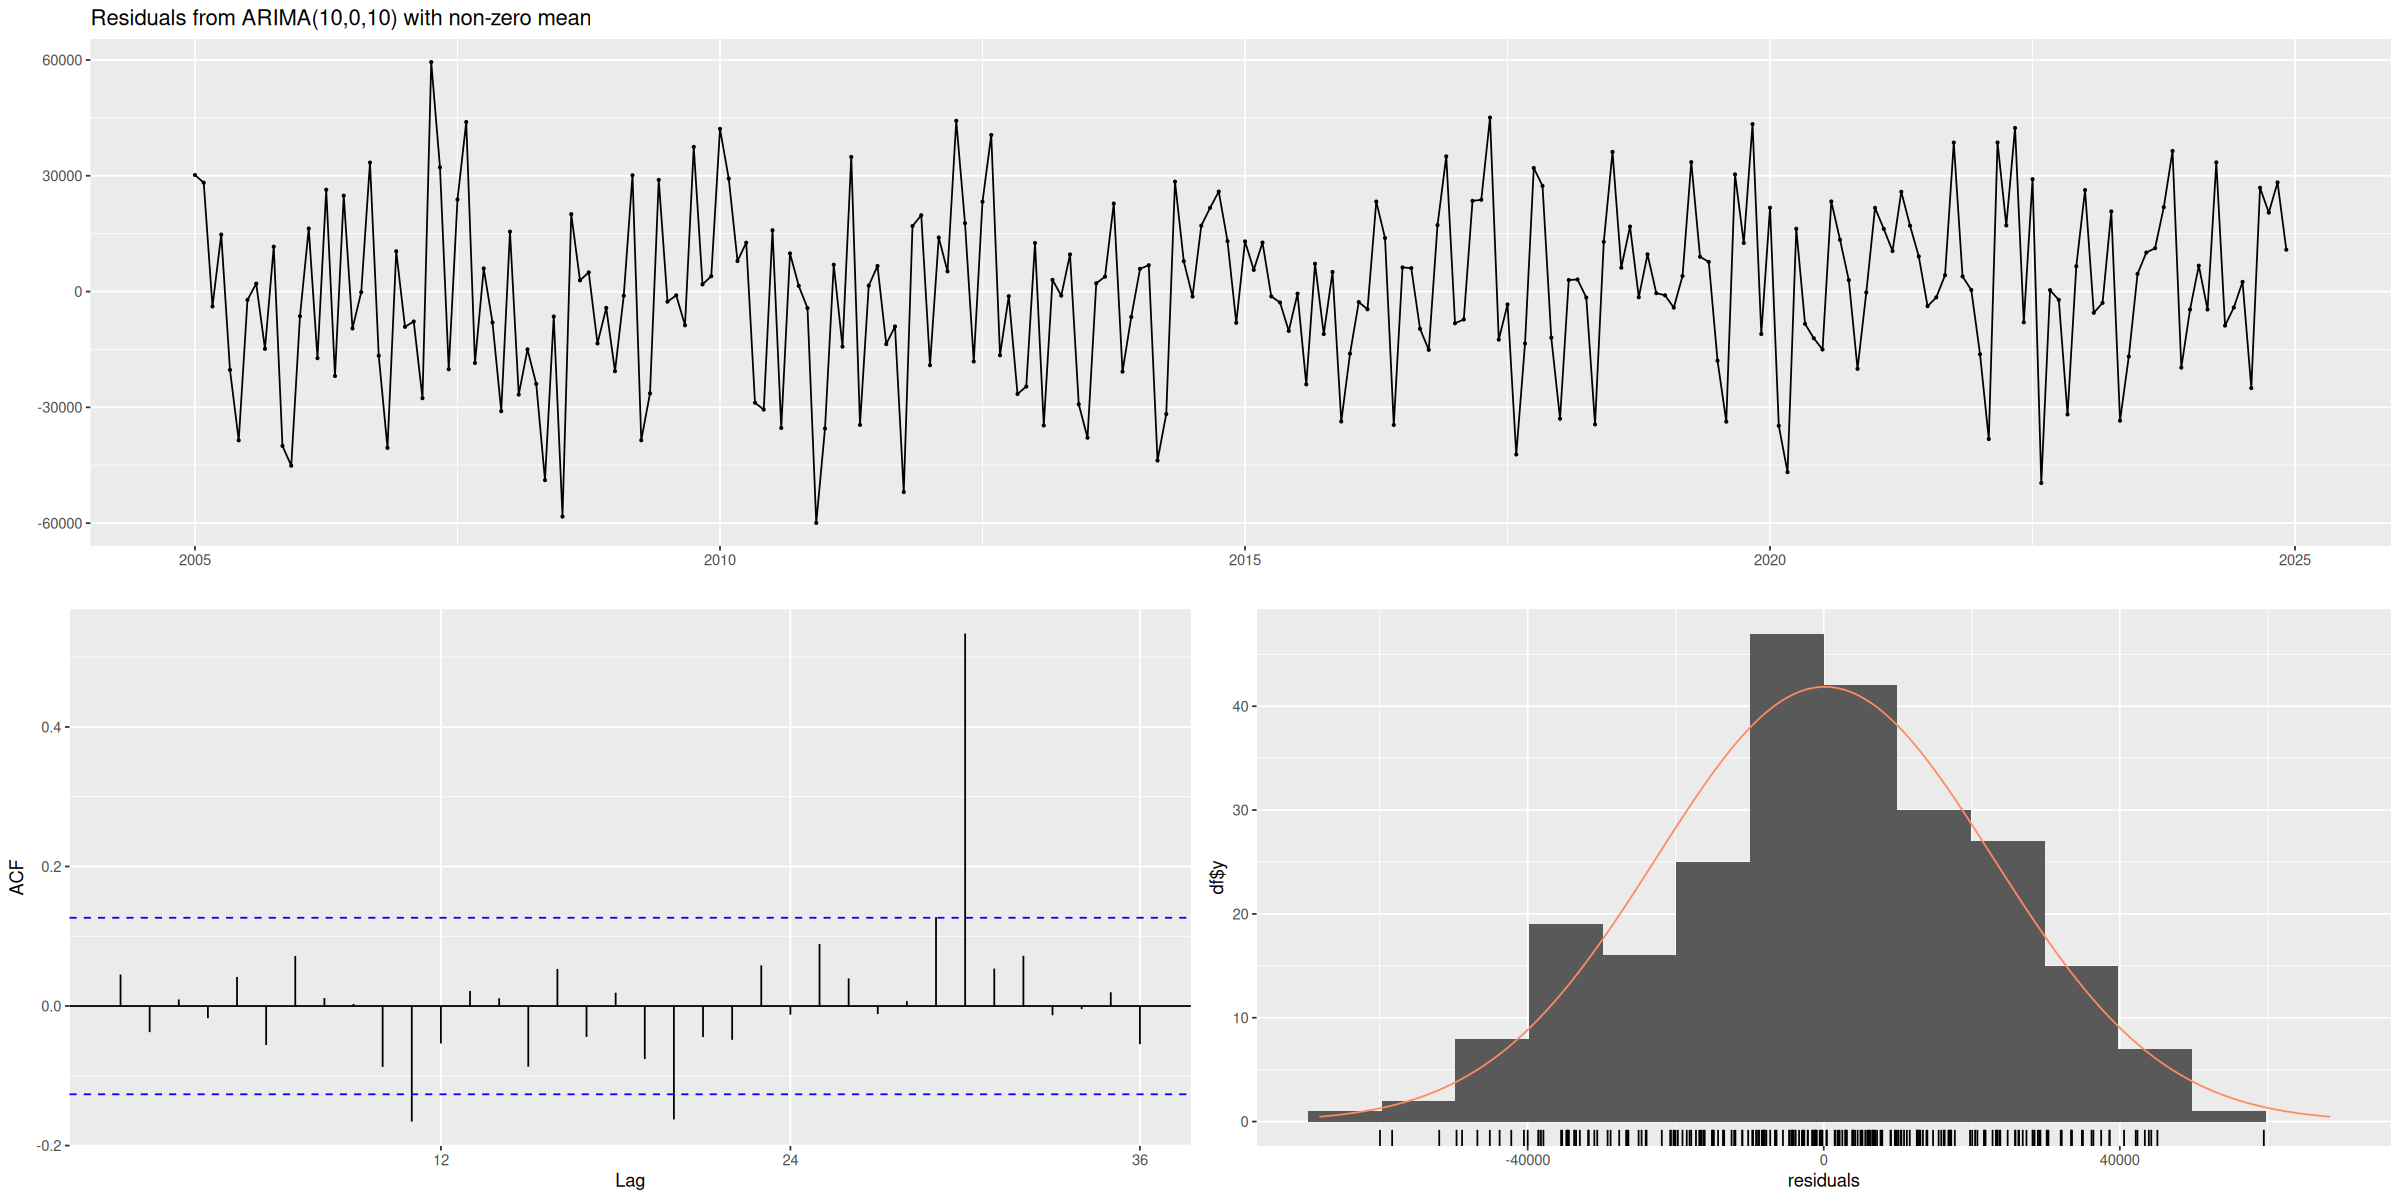


Shapiro-Wilk test for normality:

	Shapiro-Wilk normality test

data:  residuals(final_model)
W = 0.99212, p-value = 0.2282

Interpretation: p-value > 0.05, residuals appear normally distributed 

Ljung-Box test for autocorrelation:

	Box-Ljung test

data:  residuals(final_model)
X-squared = 13.075, df = 12, p-value = 0.3636

Interpretation: p-value > 0.05, no significant autocorrelation remains 

ARCH test for conditional heteroskedasticity:

	ARCH LM-test; Null hypothesis: no ARCH effects

data:  residuals(final_model)
Chi-squared = 14.357, df = 12, p-value = 0.2785

Interpretation: p-value > 0.05, no significant ARCH effects detected 

Runs test for randomness:

	Runs Test - Two sided

data:  residuals(final_model) > 0
Standardized Runs Statistic = -Inf, p-value < 2.2e-16

Interpretation: p-value < 0.05, residuals may not be random 


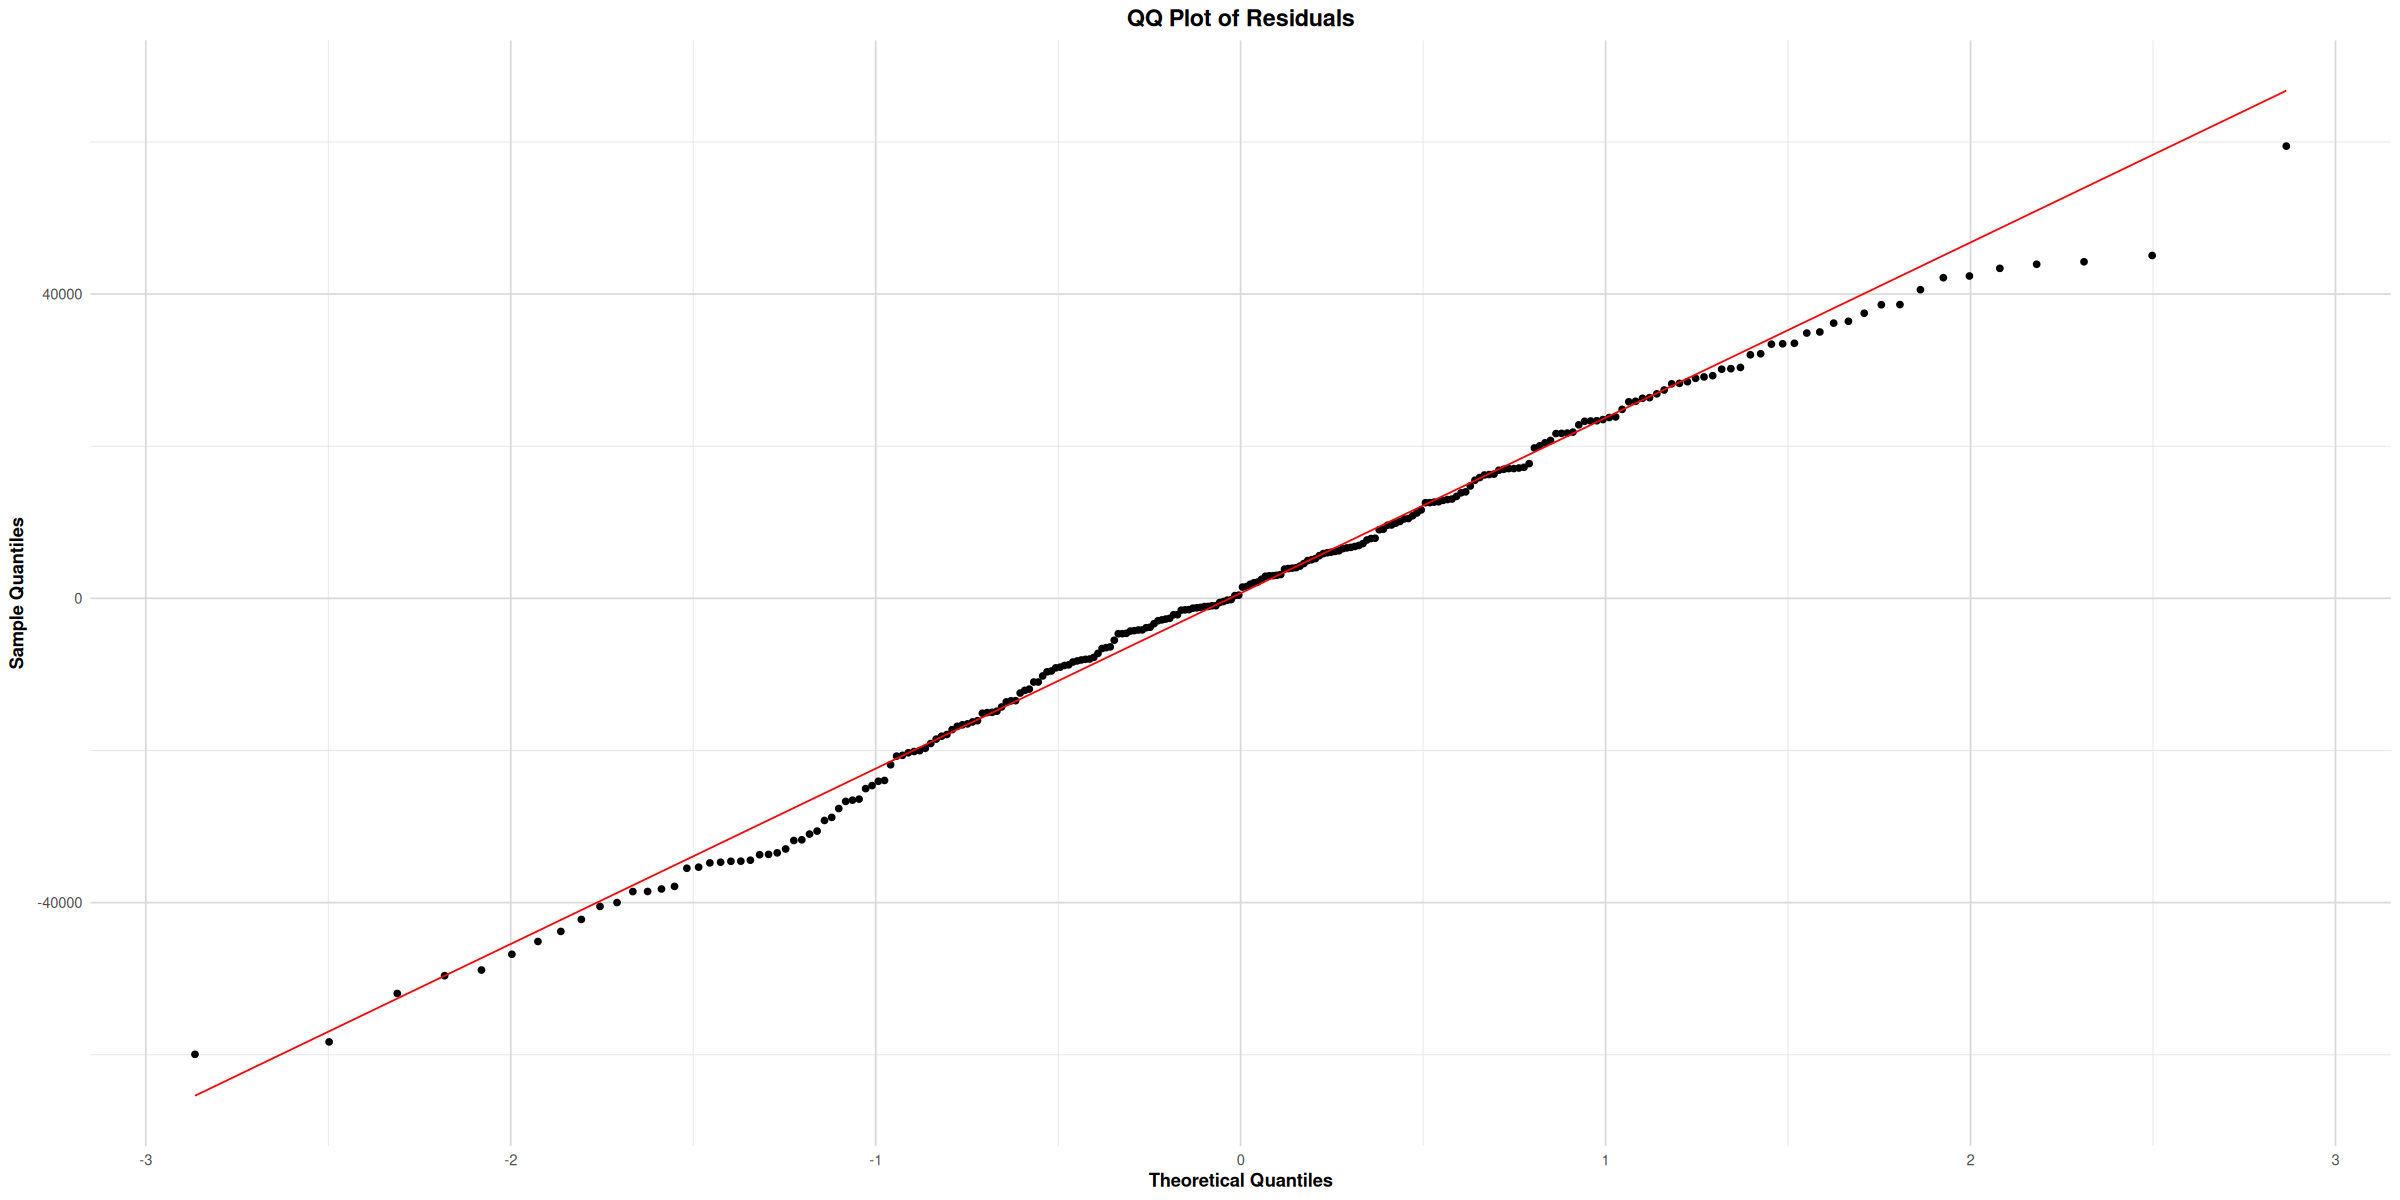


Forecast for Doubleknit Fabric Demand (Next 24 Months):
     Period Point_Forecast Lower_80 Upper_80 Lower_95 Upper_95
1  Jan 2025          593.2    538.9    642.9    507.8    667.7
2  Feb 2025          574.4    517.9    625.9    485.3    651.5
3  Mar 2025          632.7    580.2    681.1    550.4    705.4
4  Apr 2025          617.0    563.1    666.6    532.3    691.4
5  May 2025          527.3    462.8    584.7    424.7    612.9
6  Jun 2025          563.4    503.5    617.4    468.7    644.3
7  Jul 2025          587.2    529.9    639.3    497.0    665.2
8  Aug 2025          609.1    553.6    659.9    521.9    685.2
9  Sep 2025          652.3    600.5    700.2    571.2    724.3
10 Oct 2025          601.6    544.9    653.5    512.3    679.3
11 Nov 2025          558.7    497.1    614.2    461.1    641.7
12 Dec 2025          615.6    559.6    666.8    527.6    692.4
13 Jan 2026          618.7    562.3    670.5    529.9    696.3
14 Feb 2026          586.5    526.5    641.0    491.7    668.

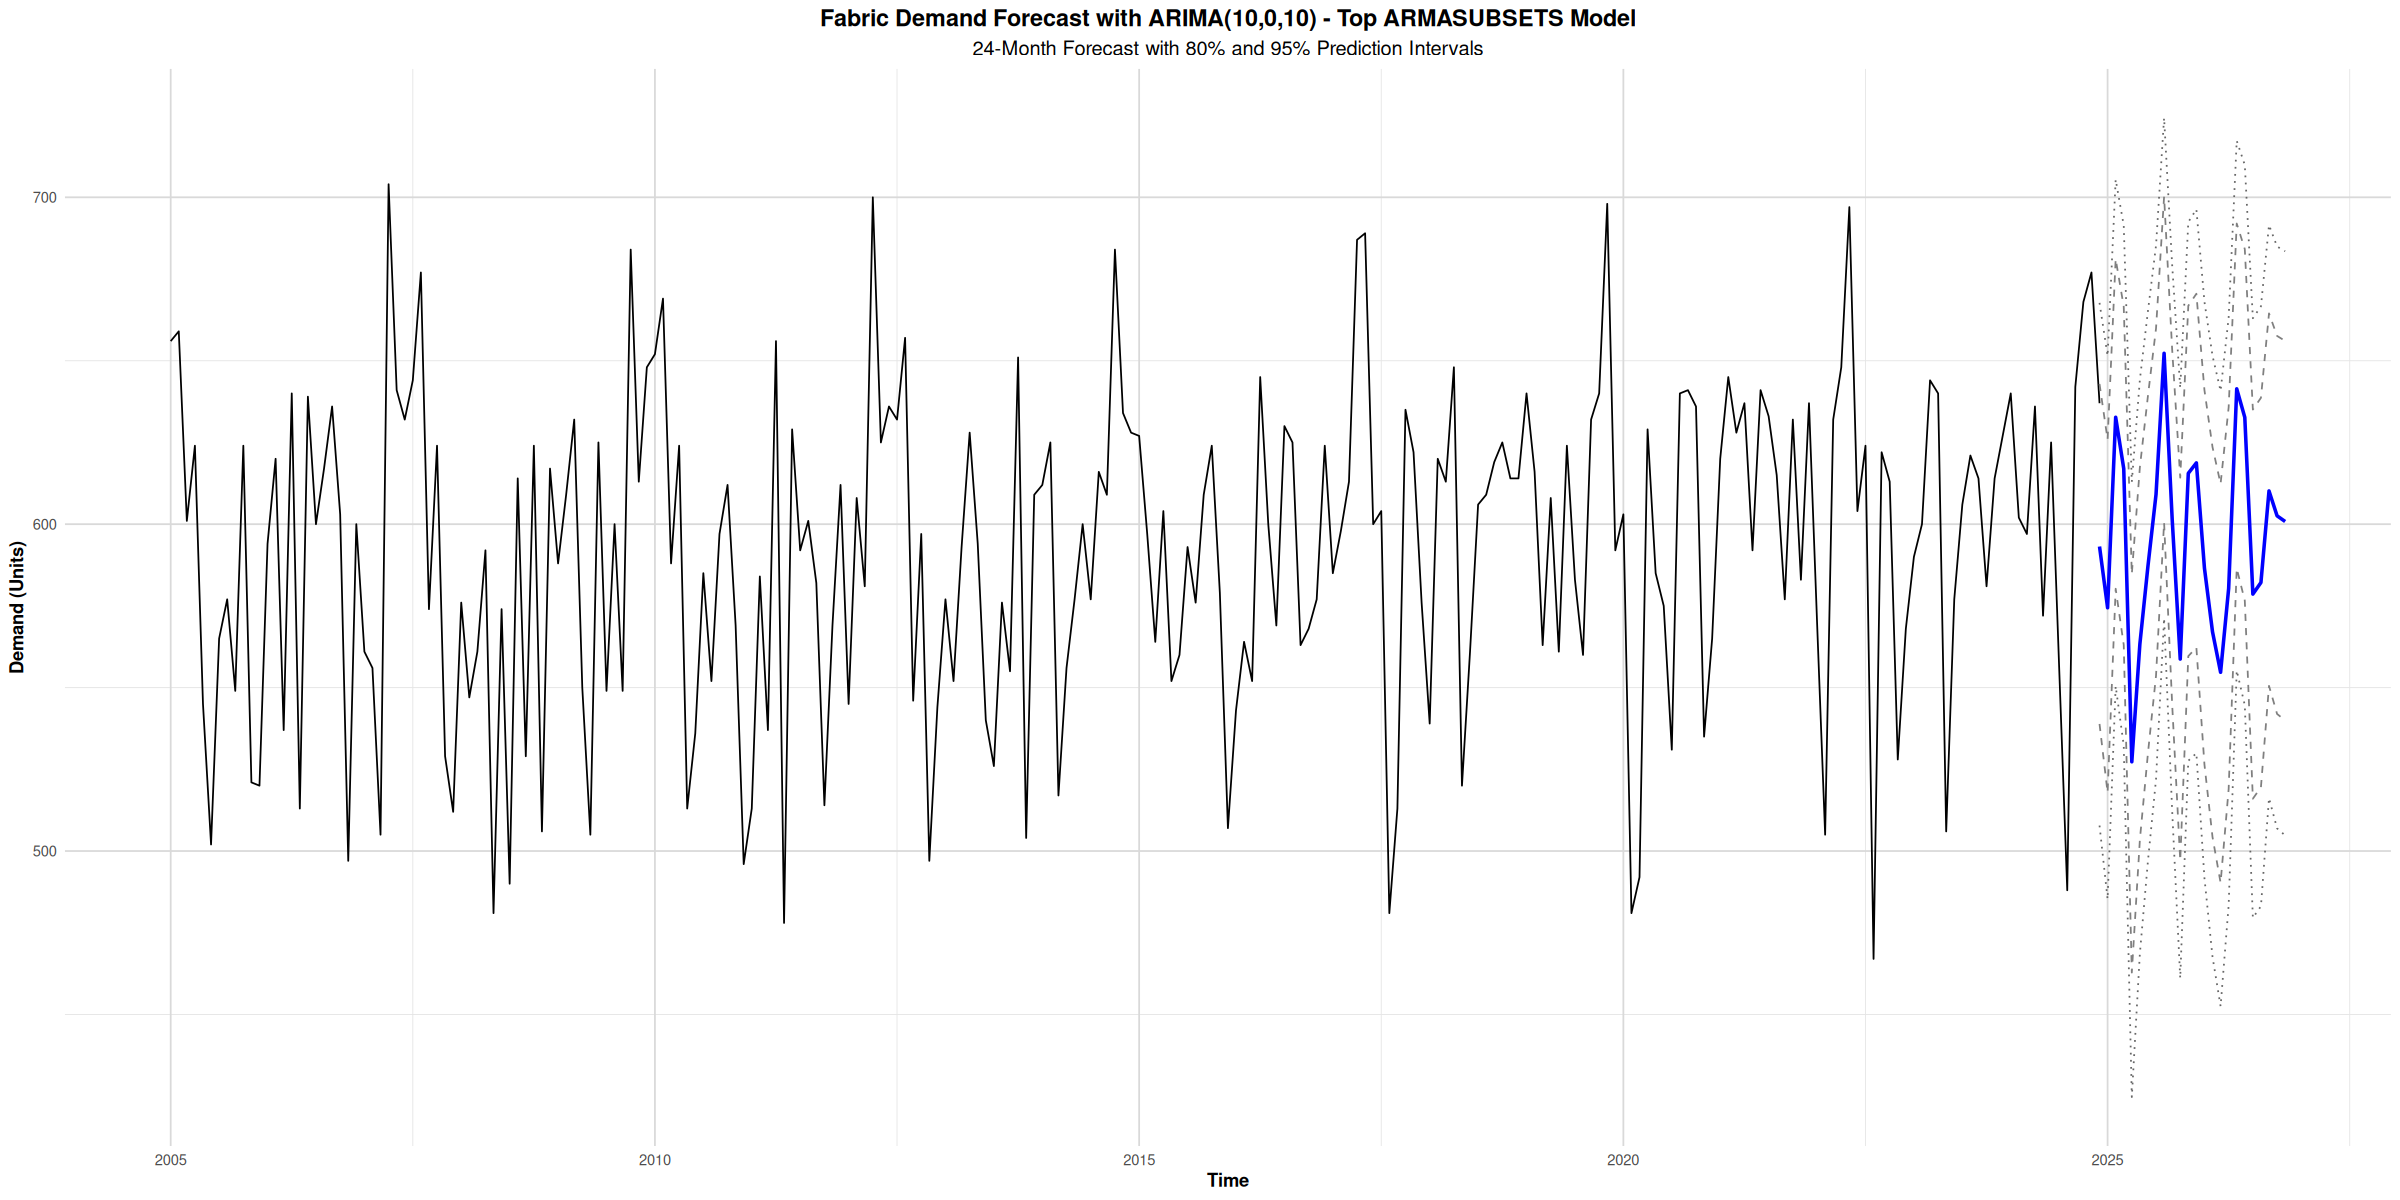

In [25]:

# Extract p and q from best model name
p <- as.numeric(gsub(".*\\(([0-9]+),[0-9]+,([0-9]+).*", "\\1", best_model_name))
q <- as.numeric(gsub(".*\\([0-9]+,[0-9]+,([0-9]+).*", "\\1", best_model_name))

# Refit best model on full transformed data
cat("Fitting ARIMA(", p, ",", d_value, ",", q, ") on full data\n", sep="")
final_model <- Arima(transformed_ts, order = c(p, d_value, q))
cat("\nModel summary:\n")
print(final_model)

# Check residuals
checkresiduals(final_model)

# QQ plot
residuals_df <- data.frame(
  Date = fabric_ts_df$date[(length(fabric_ts_df$date) - length(residuals(final_model)) + 1):length(fabric_ts_df$date)],
  Residuals = residuals(final_model)
)

p_qq <- ggplot(residuals_df, aes(sample = Residuals)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  labs(
    title = "QQ Plot of Residuals",
    x = "Theoretical Quantiles",
    y = "Sample Quantiles"
  ) +
  theme_tsa()
print(p_qq)

# Normality test
shapiro_test <- shapiro.test(residuals(final_model))
cat("\nShapiro-Wilk test for normality:\n")
print(shapiro_test)
cat("Interpretation: p-value", ifelse(shapiro_test$p.value > 0.05, 
    "> 0.05, residuals appear normally distributed", 
    "< 0.05, residuals not normally distributed"), "\n")

# Ljung-Box test for autocorrelation
lb_test <- Box.test(residuals(final_model), lag = 12, type = "Ljung-Box")
cat("\nLjung-Box test for autocorrelation:\n")
print(lb_test)
cat("Interpretation: p-value", ifelse(lb_test$p.value > 0.05, 
    "> 0.05, no significant autocorrelation remains", 
    "< 0.05, significant autocorrelation remains"), "\n")

# ARCH test for heteroskedasticity
arch_test <- ArchTest(residuals(final_model), lags = 12)
cat("\nARCH test for conditional heteroskedasticity:\n")
print(arch_test)
cat("Interpretation: p-value", ifelse(arch_test$p.value > 0.05, 
    "> 0.05, no significant ARCH effects detected", 
    "< 0.05, ARCH effects present"), "\n")

# Runs test for randomness
runs_test <- runs.test(residuals(final_model) > 0)
cat("\nRuns test for randomness:\n")
print(runs_test)
cat("Interpretation: p-value", ifelse(runs_test$p.value > 0.05, 
    "> 0.05, residuals appear random", 
    "< 0.05, residuals may not be random"), "\n")

# ------------------------------------------------
# 8. Final Forecast and Conclusion
# ------------------------------------------------

# Generate multi-step forecasts
forecast_horizon <- 24  # 2 years (24 months)
future_forecasts <- forecast(final_model, h = forecast_horizon)

# Back-transform forecasts if needed
if (transformation_label == "Log Transformation") {
  back_forecasts <- exp(future_forecasts$mean)
  back_lower <- exp(future_forecasts$lower)
  back_upper <- exp(future_forecasts$upper)
} else if (grepl("Box-Cox", transformation_label)) {
  back_forecasts <- InvBoxCox(future_forecasts$mean, lambda)
  back_lower <- InvBoxCox(future_forecasts$lower, lambda)
  back_upper <- InvBoxCox(future_forecasts$upper, lambda)
} else {
  back_forecasts <- future_forecasts$mean
  back_lower <- future_forecasts$lower
  back_upper <- future_forecasts$upper
}

# Plot final forecast
last_time <- time(fabric_ts)[length(fabric_ts)]
last_year <- trunc(last_time)
last_period <- (last_time - last_year) * 12 + 1

autoplot(fabric_ts) +
  autolayer(ts(back_forecasts, 
               start = c(last_year + (last_period >= 12), last_period %% 12 + (last_period %% 12 == 0)*12),
               frequency = 12), 
           series = "Forecast", size = 1, color = "blue") +
  autolayer(ts(back_lower[,1], 
               start = c(last_year + (last_period >= 12), last_period %% 12 + (last_period %% 12 == 0)*12),
               frequency = 12), 
            series = "Lower 80%", size = 0.5, linetype = "dashed", color = "gray50") +
  autolayer(ts(back_upper[,1], 
               start = c(last_year + (last_period >= 12), last_period %% 12 + (last_period %% 12 == 0)*12),
               frequency = 12), 
            series = "Upper 80%", size = 0.5, linetype = "dashed", color = "gray50") +
  autolayer(ts(back_lower[,2], 
               start = c(last_year + (last_period >= 12), last_period %% 12 + (last_period %% 12 == 0)*12),
               frequency = 12), 
            series = "Lower 95%", size = 0.5, linetype = "dotted", color = "gray40") +
  autolayer(ts(back_upper[,2], 
               start = c(last_year + (last_period >= 12), last_period %% 12 + (last_period %% 12 == 0)*12),
               frequency = 12), 
            series = "Upper 95%", size = 0.5, linetype = "dotted", color = "gray40") +
  labs(
    title = paste("Fabric Demand Forecast with", best_model_name),
    subtitle = "24-Month Forecast with 80% and 95% Prediction Intervals",
    x = "Time", y = "Demand (Units)"
  ) +
  theme_tsa()

# Create forecast table
forecast_dates <- seq.Date(from = max(fabric_ts_df$date) + months(1), by = "month", length.out = forecast_horizon)
forecast_months <- format(forecast_dates, "%b %Y")

forecast_table <- data.frame(
  Period = forecast_months,
  Point_Forecast = round(back_forecasts, 1),
  Lower_80 = round(back_lower[,1], 1),
  Upper_80 = round(back_upper[,1], 1),
  Lower_95 = round(back_lower[,2], 1),
  Upper_95 = round(back_upper[,2], 1)
)

cat("\nForecast for Doubleknit Fabric Demand (Next 24 Months):\n")
print(forecast_table)

# Calculate average forecast stats
avg_forecast <- mean(back_forecasts)
min_forecast <- min(back_forecasts)
max_forecast <- max(back_forecasts)

cat("\nForecast Summary Statistics:\n")
cat("Average predicted demand:", round(avg_forecast, 1), "units\n")
cat("Minimum predicted demand:", round(min_forecast, 1), "units\n")
cat("Maximum predicted demand:", round(max_forecast, 1), "units\n")

# Final Conclusions
cat("\n------------------------------------------------------------------\n")
cat("CONCLUSIONS: DOUBLEKNIT FABRIC DEMAND ANALYSIS\n")
cat("------------------------------------------------------------------\n\n")

cat("1. TIME SERIES CHARACTERISTICS:\n")
if (d_value == 0) {
  cat("   - The fabric demand series is stationary without differencing\n")
} else {
  cat("   - The fabric demand series required differencing to achieve stationarity\n")
}

if (grepl("Log", transformation_label) || grepl("Box-Cox", transformation_label)) {
  cat("   - Data required transformation (", transformation_label, ") to stabilize variance\n", sep="")
}

cat("\n2. OPTIMAL MODEL SPECIFICATION:\n")
cat("   - The", best_model_name, "model provided the best forecasting performance\n")
cat("     based on out-of-sample validation, with an RMSE of", 
    round(forecast_results$RMSE[1], 4), "and MAPE of", 
    round(forecast_results$MAPE[1], 2), "%.\n")

cat("\n3. DIAGNOSTIC ASSESSMENT:\n")
if (shapiro_test$p.value > 0.05) {
  cat("   - Residuals show normal distribution (Shapiro-Wilk p-value =", 
      round(shapiro_test$p.value, 4), ").\n")
} else {
  cat("   - Residuals deviate from normal distribution (Shapiro-Wilk p-value =", 
      round(shapiro_test$p.value, 4), ").\n")
}

if (lb_test$p.value > 0.05) {
  cat("   - No significant residual autocorrelation (Ljung-Box p-value =", 
      round(lb_test$p.value, 4), ").\n")
} else {
  cat("   - Some residual autocorrelation remains (Ljung-Box p-value =", 
      round(lb_test$p.value, 4), ").\n")
}

if (arch_test$p.value > 0.05) {
  cat("   - No conditional heteroskedasticity detected (ARCH p-value =", 
      round(arch_test$p.value, 4), ").\n")
} else {
  cat("   - ARCH effects present in residuals (ARCH p-value =", 
      round(arch_test$p.value, 4), ").\n")
}

cat("\n4. FORECAST IMPLICATIONS:\n")
cat("   - Average projected demand for the next 24 months is", round(avg_forecast, 1), "units\n")
cat("   - The forecast suggests demand will range between", round(min_forecast, 1), 
    "and", round(max_forecast, 1), "units\n")
cat("   - This information can help inform inventory planning and production scheduling\n")

cat("\n5. BUSINESS RECOMMENDATIONS:\n")
cat("   - Maintain inventory levels to satisfy at least", round(min_forecast, 1), "units of monthly demand\n")
cat("   - Plan production capacity for peak demands of up to", round(max_forecast, 1), "units\n")
cat("   - Consider the prediction intervals when making risk-sensitive planning decisions\n")
cat("   - Revisit and update the forecast model as new demand data becomes available\n")

cat("\nDate of analysis: 2025-03-29\n")